In [ ]:
import sympy as smp

## Dynamical Variables
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)
theta = smp.symbols('theta', real = True) ## theta is the angle between r1 and r2 vector.

## To get theta (or more specifically, cos(theta))
x1 = smp.Function(r'x1')(r1, theta1, phi1)
x2 = smp.Function(r'x2')(r2, theta2, phi2)

y1 = smp.Function(r'y1')(r1, theta1, phi1)
y2 = smp.Function(r'y2')(r2, theta2, phi2)

z1 = smp.Function(r'z1')(r1, theta1)
z2 = smp.Function(r'z2')(r2, theta2)

## Wavefunction and Potential V
Psi = smp.Function('Psi')(r1, theta1, phi1, r2, theta2, phi2)
V = smp.Function('V')(r1, theta1, phi1, r2, theta2, phi2)

In [ ]:
## To define Hamiltonian operator

absolute_diff = smp.sqrt(r1**2 + r2**2 - 2*r1*r2*smp.cos(theta))  ## |r1 - r1|
V_eff = -2/r1 - 2/r2 + 1/(absolute_diff)  ## V = -2/r1 -2/r2 + 1/|r1-r2|

Laplacian = - 1/2 * (1/r1**2) * smp.diff(r1**2 * smp.diff(Psi, r1), r1) - 1/2 * (1/r2**2) * smp.diff(r2**2 * smp.diff(Psi, r2), r2) - 1/2 * (1/(r1**2 * smp.sin(theta1))) * smp.diff(smp.sin(theta1) * smp.diff(Psi, theta1), theta1) - 1/2 * (1/(r2**2 * smp.sin(theta2))) * smp.diff(smp.sin(theta2) * smp.diff(Psi, theta2), theta2) - 1/2 * (1/(r1**2 * smp.sin(theta1)**2)) * smp.diff(smp.diff(Psi, phi1), phi1) - 1/2 * (1/(r2**2 * smp.sin(theta2)**2)) * smp.diff(smp.diff(Psi, phi2), phi2)

Hamiltonian = V_eff*Psi + Laplacian

Hamiltonian

(1/sqrt(r1**2 - 2*r1*r2*cos(theta) + r2**2) - 2/r2 - 2/r1)*Psi(r1, theta1, phi1, r2, theta2, phi2) - 0.5*(r2**2*Derivative(Psi(r1, theta1, phi1, r2, theta2, phi2), (r2, 2)) + 2*r2*Derivative(Psi(r1, theta1, phi1, r2, theta2, phi2), r2))/r2**2 - 0.5*(sin(theta2)*Derivative(Psi(r1, theta1, phi1, r2, theta2, phi2), (theta2, 2)) + cos(theta2)*Derivative(Psi(r1, theta1, phi1, r2, theta2, phi2), theta2))/(r2**2*sin(theta2)) - 0.5*Derivative(Psi(r1, theta1, phi1, r2, theta2, phi2), (phi2, 2))/(r2**2*sin(theta2)**2) - 0.5*(r1**2*Derivative(Psi(r1, theta1, phi1, r2, theta2, phi2), (r1, 2)) + 2*r1*Derivative(Psi(r1, theta1, phi1, r2, theta2, phi2), r1))/r1**2 - 0.5*(sin(theta1)*Derivative(Psi(r1, theta1, phi1, r2, theta2, phi2), (theta1, 2)) + cos(theta1)*Derivative(Psi(r1, theta1, phi1, r2, theta2, phi2), theta1))/(r1**2*sin(theta1)) - 0.5*Derivative(Psi(r1, theta1, phi1, r2, theta2, phi2), (phi1, 2))/(r1**2*sin(theta1)**2)

In [ ]:
x1 = r1 * smp.sin(theta1) * smp.cos(phi1)
x2 = r2 * smp.sin(theta2) * smp.cos(phi2)

y1 = r1 * smp.sin(theta1) * smp.sin(phi1)
y2 = r2 * smp.sin(theta2) * smp.sin(phi2)

z1 = r1 * smp.cos(theta1)
z2 = r2 * smp.cos(theta2)

# r1 and r2 vector in cartesian coordinates
r1_cartesian = smp.Matrix([x1, y1, z1])
r2_cartesian = smp.Matrix([x2, y2, z2])

# Compute the dot product
dot_product = r1_cartesian.dot(r2_cartesian)

# Compute the magnitude of r1 and r2
magnitude_r1 = smp.sqrt(x1**2 + y1**2 + z1**2)
magnitude_r2 = smp.sqrt(x2**2 + y2**2 + z2**2)

# Compute cos(theta) and sin(theta)
cos_theta = dot_product / (magnitude_r1 * magnitude_r2)
sin_theta = smp.sqrt(1 - cos_theta**2)

In [ ]:
Phi_1 = smp.Function('\Phi_1')(r1,theta1, phi1, r2, theta2, phi2)
Phi_1 = smp.exp(-2 * (r1 + r2))

In [ ]:
Phi_1 = Phi_1.subs(smp.cos(theta), cos_theta).subs(smp.sin(theta), sin_theta)

In [ ]:
Hamiltonian_modified = Hamiltonian.subs(smp.cos(theta), cos_theta).subs(smp.sin(theta), sin_theta)

In [ ]:
# proposed pdf
pdf = (Phi_1)**2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

In [ ]:
pdf_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], pdf)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def p(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result_p = pdf_f(r1, theta1, phi1, r2, theta2, phi2)

        # Check for NaN or inf values
    if np.isnan(result_p) or np.isinf(result_p):
      return -np.inf

    else:
      return result_p

In [ ]:
def metropolis_sampling(p, initial, num_samples, Range_value, std):

  current_r1, current_theta1, current_phi1, current_r2, current_theta2, current_phi2 = initial
  range_r, range_theta, range_phi = Range_value

  current = initial
  samples = []
  num_accept = 0

  for i in range(num_samples):
    while True: ## This while loop is used to eliminate those samples for which Num or Den is infinity or Nan.

      candidate_theta1 = np.random.uniform(0, np.pi)
      candidate_theta2 = np.random.uniform(0, np.pi)

      candidate_phi1 = np.random.uniform(0, 2*np.pi)
      candidate_phi2 = np.random.uniform(0, 2*np.pi)

      candidate_r1 = current_r1 + range_r * (np.random.uniform(0,1) - 0.5)
      candidate_r2 = current_r2 + range_r * (np.random.uniform(0,1) - 0.5)

      if candidate_theta1 > np.pi:
        candidate_theta1 = np.pi - (candidate_theta1 - np.pi)

      if candidate_theta2 > np.pi:
        candidate_theta2 = np.pi - (candidate_theta2 - np.pi)

      if candidate_theta1 < 0:
        candidate_theta1 = -candidate_theta1

      if candidate_theta2 < 0:
        candidate_theta2 = -candidate_theta2

      if candidate_phi1 > 2*np.pi:
        candidate_phi1 = candidate_phi1 - 2*np.pi

      if candidate_phi2 > 2*np.pi:
        candidate_phi2 = candidate_phi2 - 2*np.pi

      if candidate_phi1 < 0:
        candidate_phi1 = -candidate_phi1

      if candidate_phi2 < 0:
        candidate_phi2 = -candidate_phi2

      if (0 <= candidate_r1 and 0 <= candidate_r2):  ## If r1 or r2 is negative, then the candidate will be discarded and we will again start within while loop

        candidate = [candidate_r1, candidate_theta1, candidate_phi1, candidate_r2, candidate_theta2, candidate_phi2]
        candidate_value_p = p(candidate)

        # Discard if candidate value is NaN or inf
        if (candidate_value_p != -np.inf):
          break

    acceptance_prob = min(1, (p(candidate) / p(current)))

    if np.random.uniform(0,1) < acceptance_prob: ## Candidate will be accepted
      current_r1, current_r2 = candidate_r1, candidate_r2
      current_theta1, current_theta2 = candidate_theta1, candidate_theta2
      current_phi1, current_phi2 = candidate_phi1, candidate_phi2

      current = [candidate_r1, candidate_theta1, candidate_phi1, candidate_r2, candidate_theta2, candidate_phi2]
      num_accept += 1

    samples.append(current)

  return np.array(samples), num_accept

In [ ]:
# Monte Carlo integration
def monte_carlo_integration(samples, p,  Num, Den):

    Num_values = np.array([Num(sample) / p(sample) for sample in samples])
    Num_values = Num_values[~np.isnan(Num_values) & ~np.isinf(Num_values)]

    Den_values = np.array([Den(sample) / p(sample) for sample in samples])
    Den_values = Den_values[~np.isnan(Den_values) & ~np.isinf(Den_values)]

    values = np.mean(Num_values) / np.mean(Den_values)

    return values, np.mean(Num_values), np.mean(Den_values)

In [ ]:
def MCI(samples, p, S):
    S_values = np.array([S(sample) / p(sample) for sample in samples])
    S_values = S_values[~np.isnan(S_values) & ~np.isinf(S_values)]

    return np.mean(S_values)

In [ ]:
H_Phi1 = Hamiltonian_modified.subs(Psi, Phi_1).simplify()

In [ ]:
Num_11 = (Phi_1 * H_Phi1) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_11 = (Phi_1*Phi_1) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

Num_11_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_11)
Den_11_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_11)

In [ ]:
## This is done to plot graphs. This will have no  impact while performing metropolis algorithm.

r1 = np.linspace(0, 4, 1000)
r2 = np.linspace(0, 4, 1000)

theta1 = np.linspace(0, np.pi, 1000)
theta2 = np.linspace(0, np.pi, 1000)

phi1 = np.linspace(0, 2*np.pi, 1000)
phi2 = np.linspace(0, 2*np.pi, 1000)

In [ ]:
Num_11_2d = Num_11_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)
Den_11_2d = Den_11_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)

pdf_2d = pdf_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)

<lambdifygenerated-5>:2: RuntimeWarning: invalid value encountered in divide
  return r1**2*r2**2*(-4.0*exp(-2*r1 - 2*r2) + 1.0*exp(-2*r1 - 2*r2)/sqrt(-2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/(abs(r1)*abs(r2)) - 2*r1**2*r2**2*cos(theta1)*cos(theta2)/(abs(r1)*abs(r2)) + r1**2 + r2**2))*exp(-2*r1 - 2*r2)*sin(theta1)*sin(theta2)


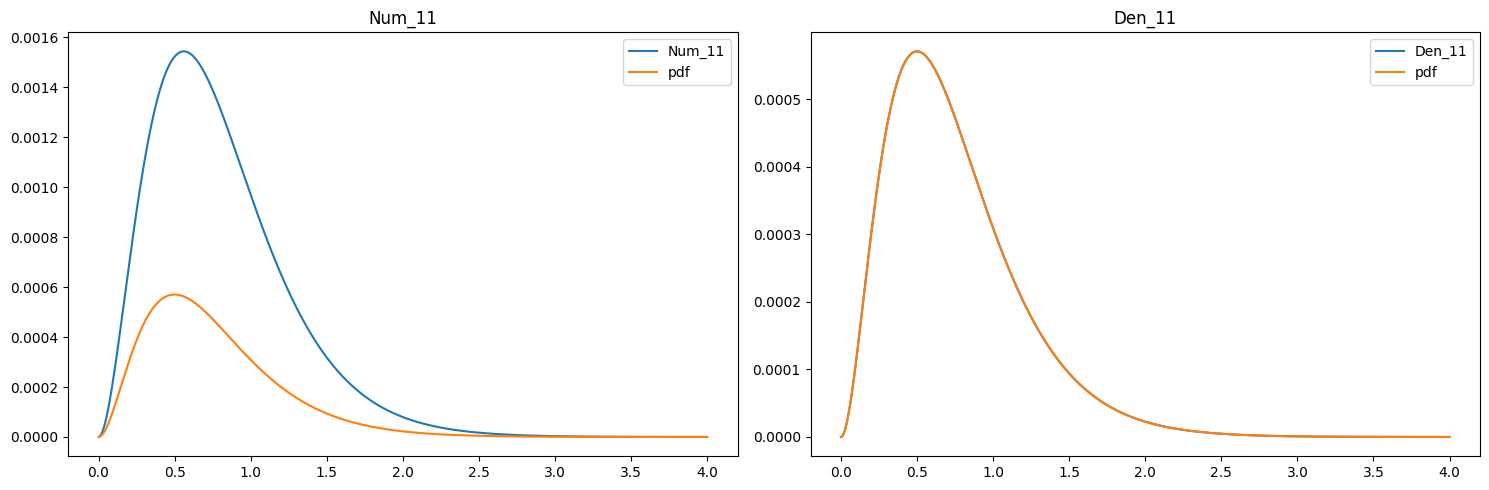

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [-Num_11_2d, Den_11_2d]
titles = ['Num_11', 'Den_11']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    ax.plot(r1 , functions[i], label = titles[i])
    # ax.plot(r1, pdf1_2d, label = 'pdf1')
    ax.plot(r1, pdf_2d, label = 'pdf')
    ax.set_title(titles[i])
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
def Num11(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_11_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den11(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_11_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [ ]:
initial = [0.333, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6]
Range_value = [0.789, 0.75, 0.75]
std = 0.225
num_samples = 100000

# Run Metropolis sampling
result_p = metropolis_sampling(p, initial, num_samples, Range_value, std)

samples_p = result_p[0]
num_accept_p = result_p[1]

## burn_in period
burn_in = 12000
samples_p = samples_p[burn_in:]

E_p_11 = monte_carlo_integration(samples_p, p, Num11, Den11)[0]
Den_p_11 = monte_carlo_integration(samples_p, p, Num11, Den11)[2]
print(f"Estimated E using P2: {E_p_11}")
print(f"Denominator using P2: {Den_p_11}")
print("Number of Samples Collected: %s"%len(samples_p))
print("Number of Samples Accepted: %s"%(num_accept_p))
print("Fraction Acceptances: %s"%(num_accept_p / num_samples))
print('')

# -2.7801211704453057
# -2.7791250905678124
# -2.7866976919689437
# -2.7770661837842714
# -2.787848454287966

Estimated E using P2: -2.787848454287966
Denominator using P2: 1.0
Number of Samples Collected: 88000
Number of Samples Accepted: 50266
Fraction Acceptances: 0.50266



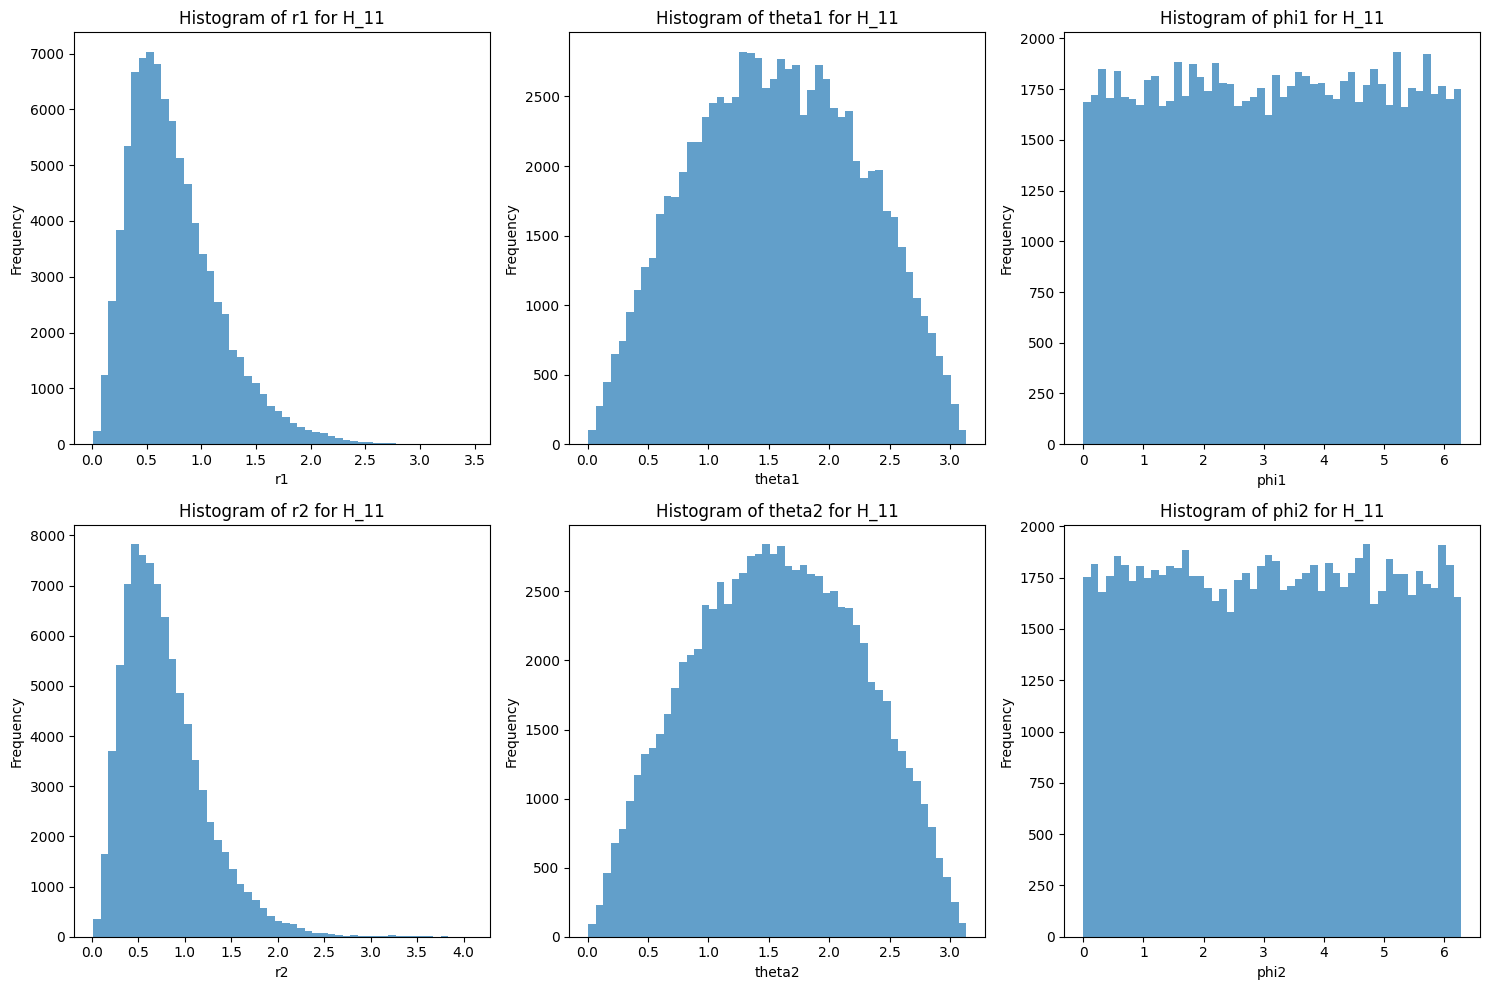

In [ ]:
# Plotting histograms for each of the variables to see the distribution of the samples.
## This is for pdf1 where samples were obtained from metropolis sampling1

variables = ['r1', 'theta1', 'phi1', 'r2', 'theta2', 'phi2']
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten()

for i in range(6):
    axs[i].hist(samples_p[:, i], bins=50, alpha=0.7)
    axs[i].set_title(f'Histogram of {variables[i]} for H_11')
    axs[i].set_xlabel(variables[i])
    axs[i].set_ylabel('Frequency')


plt.tight_layout()
plt.show()